### 1. Import Libraries and Load Data
In this step, we will install and import essential libraries needed for data handling, visual representation, and text analysis. Additionally, we load the Netflix dataset, which includes information about the movies and TV shows available on the service.

In [52]:
##pip install -r requirements.txt

In [53]:
# Importing all essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Set configurations
%matplotlib inline
warnings.filterwarnings('ignore')

In [54]:
# Loading the dataset
netflix = pd.read_csv('netflix_titles.csv')

### 2. Data Analysis and Visualization
In this step, we will perform exploratory data analysis (EDA) to understand the distribution and patterns in the data.

In [55]:
# Display the first few rows of the dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
# Checking the shape of the dataset
netflix.shape

(8807, 12)

In [57]:
# Checking the count of non-null values in each column
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [58]:
# Get information about the dataset
print(netflix.info())

# Describe numerical columns
print(netflix.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [59]:
# Check for missing values
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [60]:
# Check data types of columns
print(netflix.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


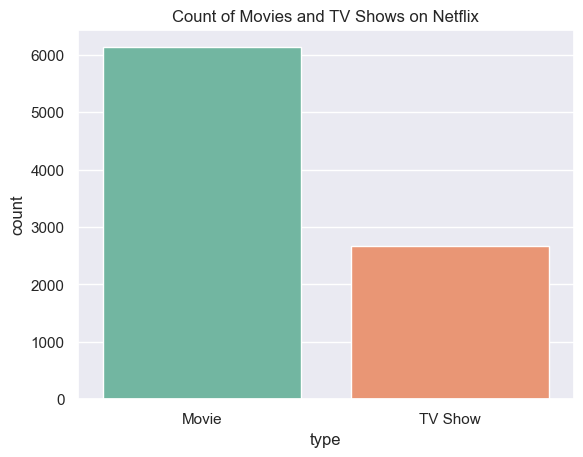

In [61]:
# Separating Movies and TV Shows
netflix_shows = netflix[netflix['type'] == 'TV Show']
netflix_movies = netflix[netflix['type'] == 'Movie']

# Visualization: Show vs Movies
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')
plt.title('Count of Movies and TV Shows on Netflix')
plt.show()

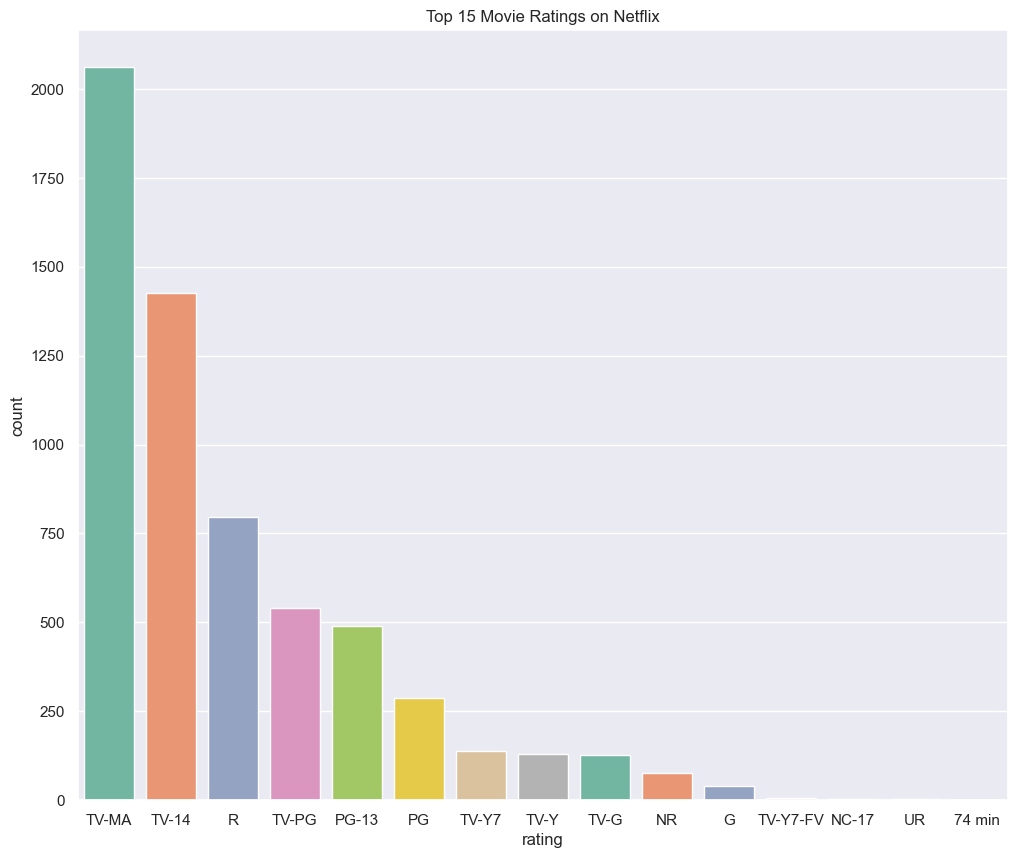

In [62]:
# Movie Ratings Analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.title('Top 15 Movie Ratings on Netflix')
plt.show()

In [63]:
data = pd.read_csv('imdb-movies-dataset.csv')
data

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


In this project, we utilize dataset from IMDb to enhance our movie recommendation system:

- IMDb Movies Dataset: This dataset provides detailed information about movies, including their title, year, and genre. These attributes help in categorizing and filtering movies, making it easier to provide recommendations based on specific criteria such as release year or genre.

In [64]:
# IMDB ratings data
#imdb_ratings = pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('imdb-movies-dataset.csv', usecols=['Title','Year','Genre','Rating'])
imdb_titles = imdb_titles.drop_duplicates(subset='Title', keep='first')

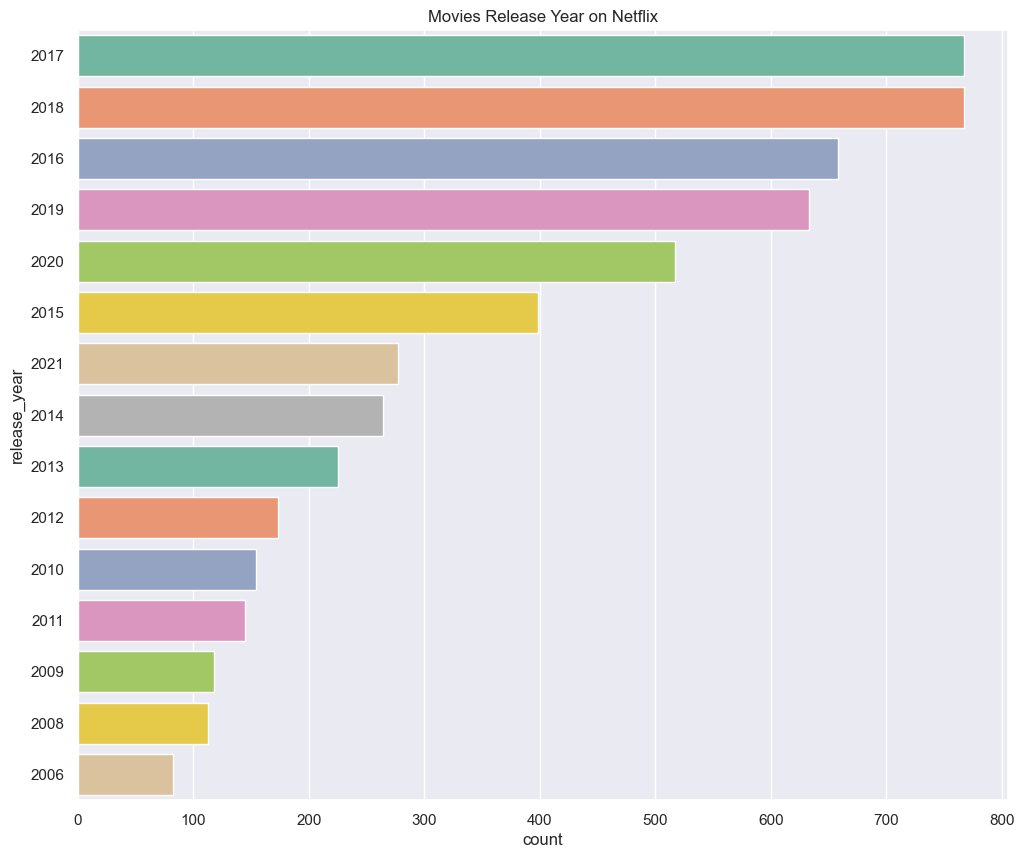

In [65]:

# Visualization: Movies release year analysis
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('Movies Release Year on Netflix')
plt.show()

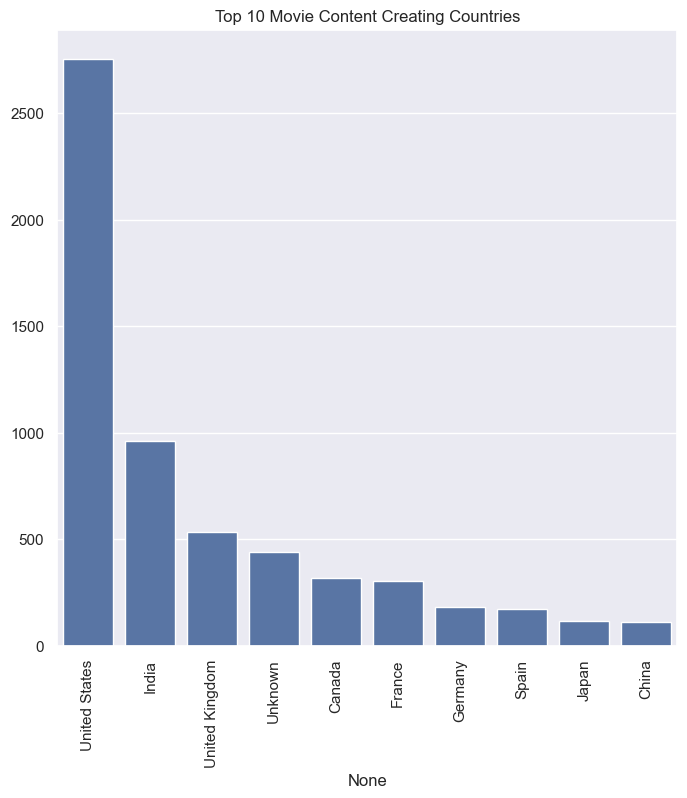

In [66]:
# Visualization: Top 10 movie content creating countries
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
countries = netflix_movies['country'].str.split(',', expand=True).stack().str.strip().value_counts()
top_countries = countries.head(10)
plt.figure(figsize=(8,8))
ax = sns.barplot(x=top_countries.index, y=top_countries.values)
ax.set_xticklabels(top_countries.index, rotation=90)
plt.title('Top 10 Movie Content Creating Countries')
plt.show()

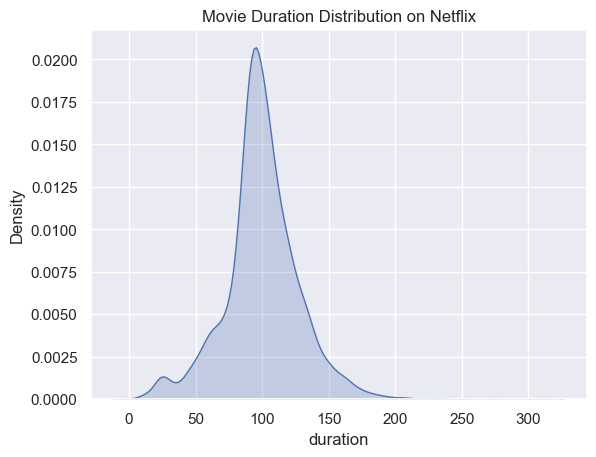

In [67]:
# Visualization: Movie duration analysis
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(float)
sns.set(style='darkgrid')
sns.kdeplot(netflix_movies['duration'], shade=True)
plt.title('Movie Duration Distribution on Netflix')
plt.show()

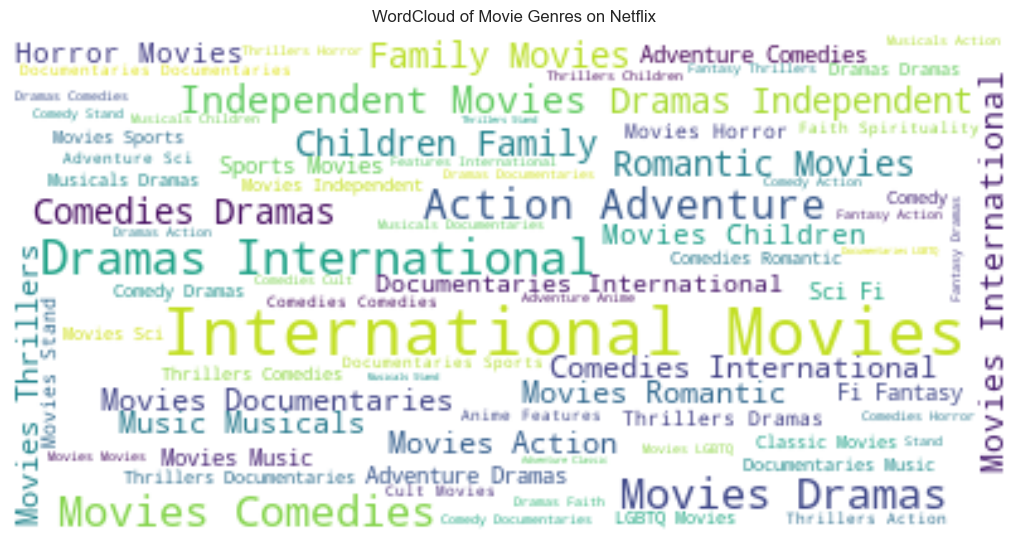

In [68]:
# WordCloud for Genres
genres = netflix_movies['listed_in'].str.split(',', expand=True).stack().str.strip().tolist()
wordcloud = WordCloud(max_words=1000000, background_color="white").generate(" ".join(genres))
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud of Movie Genres on Netflix')
plt.show()

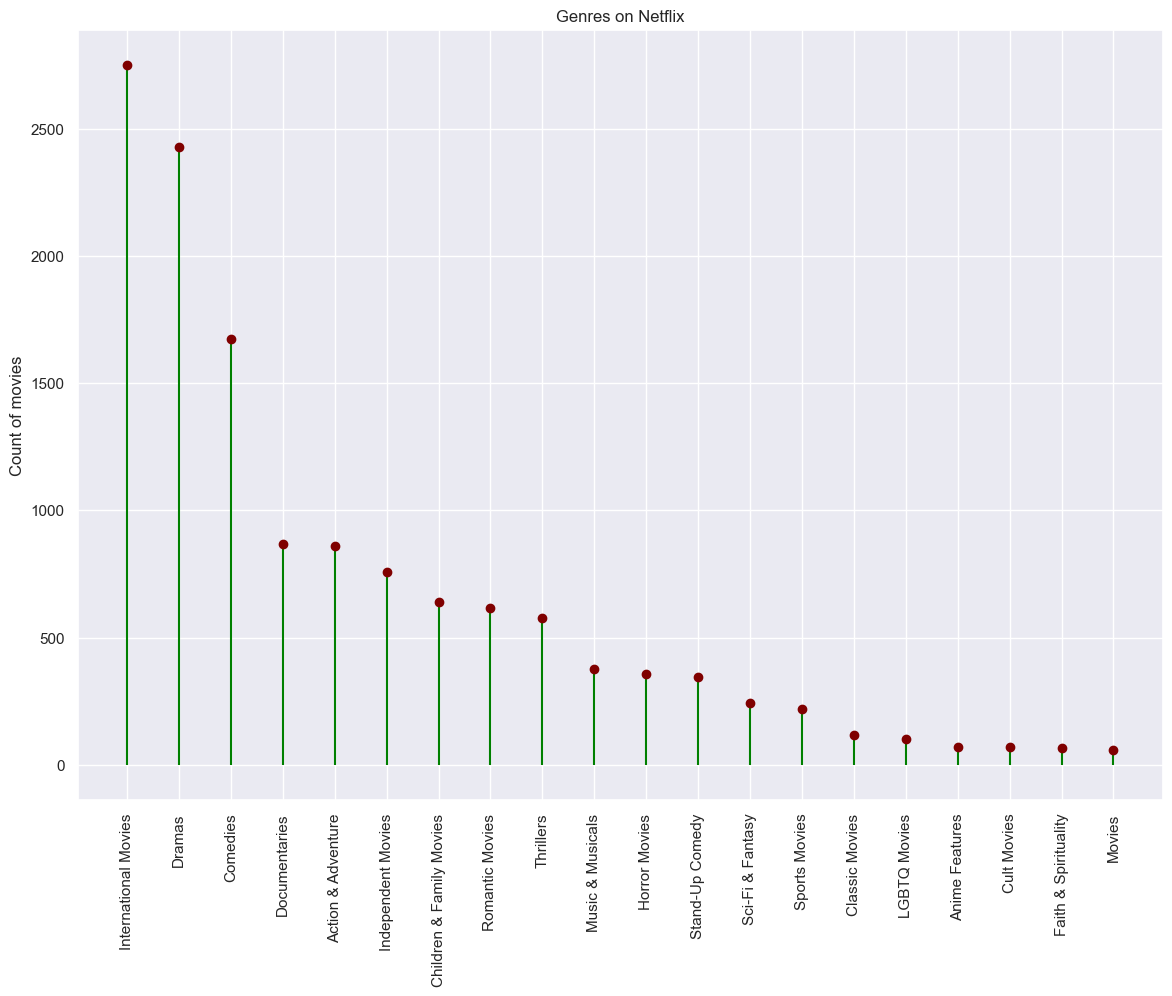

In [69]:
# Lollipop chart of genres vs their count on Netflix
genre_counts = Counter(genres)
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(figsize=(14, 10))
ax.vlines(x=list(genre_counts.keys()), ymin=0, ymax=list(genre_counts.values()), color='green')
ax.plot(list(genre_counts.keys()), list(genre_counts.values()), "o", color='maroon')
ax.set_xticklabels(list(genre_counts.keys()), rotation=90)
ax.set_ylabel("Count of movies")
ax.set_title("Genres on Netflix")
plt.show()

### 3. Content-based Recommendation System
In this section, we develop a content-based recommendation system using the TF-IDF vectorizer to analyze the descriptions of movies and TV shows. We start by initializing a TF-IDF vectorizer configured to ignore English stop words and convert the descriptions into numerical vectors. Next, we compute the cosine similarity matrix from these vectors to determine the similarity between different movies or TV shows based on their descriptions. A function, `get_recommendation`, is defined to take a movie title as input and return a list of similar movies. This function finds the index of the given title, retrieves similarity scores for all movies, sorts these scores in descending order, and returns the top 10 most similar movies as recommendations. We demonstrate the use of this recommendation function with an example, providing recommendations for the TV show "Peaky Blinders." This content-based recommendation system helps users discover similar content based on textual descriptions, aligning with their interests and preferences.

In [70]:
# Joining the datasets
joint_data = imdb_titles.merge(netflix, left_on='Title', right_on='title', how='inner')


In [71]:
##Feature Engineering
joint_data = joint_data.drop(['title','Year','show_id','type','country','date_added','release_year','rating'
,'duration'], axis=1)

In [72]:
joint_data.head()

,Title,Genre,Rating,director,cast,listed_in,description
0,The Crow,"Action, Crime, Fantasy",NaN,Alex Proyas,"Brandon Lee, Rochelle Davis, Ernie Hudson, Mic...","Action & Adventure, Cult Movies, Sci-Fi & Fantasy",One year after Eric Draven and his fiancée are...
1,Dark Waters,"Biography, Drama, History",7.6,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...","Classic Movies, Dramas, International Movies",A fisherman returns home after a three-year ab...
2,Love,"Drama, Romance",6.1,Khalid Rahman,"Shine Tom Chacko, Rajisha Vijayan, Gokulan, Su...","Dramas, Independent Movies, International Movies",The troubling inner workings of a toxic marria...
3,Pulp Fiction,"Crime, Drama",8.9,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...","Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
4,Inception,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...


In [77]:
# Content-based Recommendation System Using TF-IDF Vectorizer for descriptions

# removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string and fliter out rows with rating less than 5.0
joint_data['description'] = joint_data['description'].fillna('')
joint_data = joint_data[joint_data['Rating'] >= 5.0]

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(joint_data['description'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(joint_data.index, index=joint_data['Title']).drop_duplicates()

# Function to get recommendations based on title
def get_recommendation(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    ##return joint_data['title'].iloc[movie_indices]
    recommendations = joint_data[['Title', 'Rating', 'Genre']].iloc[movie_indices]
    
    recommendations = recommendations.sort_values(by='Rating', ascending=False)
    
    return recommendations

In [78]:
# Recommendations
print(get_recommendation('Total Recall'))

                            Title  Rating                         Genre
1206                         Mimi     7.8                 Comedy, Drama
153       Silver Linings Playbook     7.7        Comedy, Drama, Romance
243   What's Eating Gilbert Grape     7.7                         Drama
983                  Welcome Home     7.4          Crime, Drama, Horror
1132                      Calibre     6.8               Drama, Thriller
504                   Unstoppable     6.8              Action, Thriller
565                The Ugly Truth     6.4               Comedy, Romance
2                            Love     6.1                Drama, Romance
752                   The Do-Over     5.7     Action, Adventure, Comedy
1093                          Hop     5.4  Animation, Adventure, Comedy


### 4. Content-based Filtering on Multiple Metrics

In this section, we enhance the content-based recommendation system by incorporating multiple features for more nuanced recommendations. We first preprocess the dataset by filling missing values and applying text normalization to various features, including title, director, cast, listed genres, and description. A "soup" of words is created by concatenating these features into a single text string for each entry. This concatenated text is then vectorized using a Count Vectorizer to transform the textual data into numerical form. The cosine similarity matrix is computed from these vectors to measure the similarity between movies based on the combined features. A new recommendation function, `get_recommendation_new`, is introduced to take a movie title, calculate similarity scores, and return the top 10 most similar movies. This method provides recommendations by considering multiple attributes of each movie, offering a more comprehensive approach to content-based filtering. For example, recommendations for the TV show "Peaky Blinders" are generated, showcasing how the system identifies similar content based on a broader set of features.

In [79]:
# Content-based filtering on multiple metrics

#Cleaning the data - filter out rows with rating less than 5.0 making all the words lower case
joint_data = joint_data[joint_data['Rating'] >= 5.0]
filledna = joint_data.fillna('')
def clean_data(x):
    return str.lower(x.replace(" ", ""))

# Identifying features on which the model is to be filtered.
features = ['Title', 'director', 'cast', 'listed_in', 'description','Genre']
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)

# Create a "soup" or a "bag of words"
def create_soup(x):
    return x['Title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['listed_in'] + ' ' + x['description'] + ' ' + x['Genre'] 
filledna['soup'] = filledna.apply(create_soup, axis=1)

# Using Count Vectorizer for the "soup"
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

# Compute the cosine similarity matrix for the "soup"
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
filledna = filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['Title'])

# Function to get recommendations based on multiple features
def get_recommendation_new(Title, cosine_sim=cosine_sim2):
    Title = Title.replace(' ', '').lower()
    idx = indices[Title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    recommendations = joint_data[['Title', 'Rating', 'Genre']].iloc[movie_indices]
    recommendations = recommendations[joint_data['Rating'] >= 5.0]
    recommendations = recommendations.sort_values(by='Rating', ascending=False)
    return recommendations
    

In [82]:
# Example recommendations with the improved model
print(get_recommendation_new('Æon Flux', cosine_sim2))
##print(get_recommendation_new('total recall', cosine_sim2))

                       Title  Rating                      Genre
4                  Inception     8.8  Action, Adventure, Sci-Fi
90              Total Recall     7.5  Action, Adventure, Sci-Fi
176                 Stargate     7.0  Action, Adventure, Sci-Fi
55   Solo: A Star Wars Story     6.9  Action, Adventure, Sci-Fi
297     Terminator Salvation     6.5  Action, Adventure, Sci-Fi
864                 Spectral     6.3  Action, Adventure, Sci-Fi
290         Superman Returns     6.1  Action, Adventure, Sci-Fi
436         The Time Machine     6.0  Action, Adventure, Sci-Fi
111                     2012     5.8  Action, Adventure, Sci-Fi
533            Green Lantern     5.5  Action, Adventure, Sci-Fi


### Conclusion

In this notebook, we have explored and implemented two distinct approaches for building a movie recommender system: a content-based recommendation system using TF-IDF vectorization and an advanced content-based filtering method utilizing multiple features and a bag of words approach. These methods offer valuable insights and practical solutions for recommending movies based on user preferences. Additionally, there is a file attached in the repository where the recommender system is deployed using Streamlit, providing a user-friendly interface for real-time recommendations.